**Team Id: PNT2022TMID10160**

# Project: Real-Time Communication system powered by AI for specially abled

Model Building

Import The Required Model Building Libraries


In [4]:
#import imagedatagenerator
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#training datagen
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [6]:
#testing datagen
test_datagen=ImageDataGenerator(rescale=1./255)

IMPORTING tensorflow

In [7]:
import tensorflow as tf
import os

**Initialize The Model**

In [3]:
#create model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
import numpy as np
import matplotlib.pyplot as plt #to view graph in colab itself
import IPython.display as display
from PIL import Image
import pathlib

Applying ImageDataGenerator to training set

In [9]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Nalaiyathiran/Dataset/training_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 15750 images belonging to 9 classes.


Applying ImageDataGenerator to test set

In [10]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Nalaiyathiran/Dataset/test_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [ ]:
a=len(x_train)
b=len(x_test)

Length of training set

In [ ]:
print(a)

79


Length of test set

In [ ]:
print(b)

12


**Add Layers**

In [ ]:
#create model
model=Sequential()

Add The Convolution Layer

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))

Add Pooling Layer

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

Add The Flatten Layer

In [ ]:
model.add(Flatten())

Adding The Dense Layers

In [ ]:
#1st hidden layer
model.add(Dense(units=512,activation='relu'))
#2nd hidden layer
model.add(Dense(units=261,activation='relu'))

In [ ]:
#output layer
model.add(Dense(units=9,activation='softmax'))

Compile The Model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit The Model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
79/79 [==============================] - 90s 1s/step - loss: 0.3965 - accuracy: 0.8746 - val_loss: 0.2797 - val_accuracy: 0.9529
Epoch 2/10
79/79 [==============================] - 86s 1s/step - loss: 0.0419 - accuracy: 0.9884 - val_loss: 0.2846 - val_accuracy: 0.9751
Epoch 3/10
79/79 [==============================] - 84s 1s/step - loss: 0.0195 - accuracy: 0.9947 - val_loss: 0.3436 - val_accuracy: 0.9751
Epoch 4/10
79/79 [==============================] - 87s 1s/step - loss: 0.0083 - accuracy: 0.9982 - val_loss: 0.3722 - val_accuracy: 0.9751
Epoch 5/10
79/79 [==============================] - 83s 1s/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.4095 - val_accuracy: 0.9756
Epoch 6/10
79/79 [==============================] - 88s 1s/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.3874 - val_accuracy: 0.9756
Epoch 7/10
79/79 [==============================] - 86s 1s/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.3891 - val_accuracy: 0.9747
Epoch 8/10
79/79 [==

Save The Model

In [ ]:
model.save('aslpng2.h5')

Import The Packages And Load The Saved Model

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

In [ ]:
#load the model
model=load_model('aslpng2.h5')

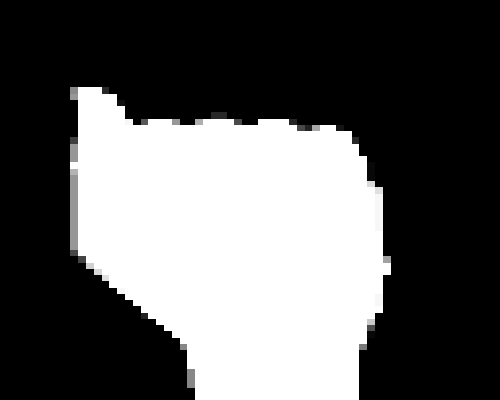

In [ ]:
img=image.load_img('/content/drive/MyDrive/Nalaiyathiran/Dataset/test_set/A/10.png',target_size=(400,500))
img